<a href="https://colab.research.google.com/github/techonair/Machine-Learing-A-Z/blob/main/Classifiers/Model%20Evaluation%20%26%20Selection/Random_Forest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest Classification**

## Importing Libraires

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset

In [2]:
from google.colab import files
files.upload()

Saving Data.csv to Data.csv


{'Data.csv': b'Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class\n1000025,5,1,1,1,2,1,3,1,1,2\n1002945,5,4,4,5,7,10,3,2,1,2\n1015425,3,1,1,1,2,2,3,1,1,2\n1016277,6,8,8,1,3,4,3,7,1,2\n1017023,4,1,1,3,2,1,3,1,1,2\n1017122,8,10,10,8,7,10,9,7,1,4\n1018099,1,1,1,1,2,10,3,1,1,2\n1018561,2,1,2,1,2,1,3,1,1,2\n1033078,2,1,1,1,2,1,1,1,5,2\n1033078,4,2,1,1,2,1,2,1,1,2\n1035283,1,1,1,1,1,1,3,1,1,2\n1036172,2,1,1,1,2,1,2,1,1,2\n1041801,5,3,3,3,2,3,4,4,1,4\n1043999,1,1,1,1,2,3,3,1,1,2\n1044572,8,7,5,10,7,9,5,5,4,4\n1047630,7,4,6,4,6,1,4,3,1,4\n1048672,4,1,1,1,2,1,2,1,1,2\n1049815,4,1,1,1,2,1,3,1,1,2\n1050670,10,7,7,6,4,10,4,1,2,4\n1050718,6,1,1,1,2,1,3,1,1,2\n1054590,7,3,2,10,5,10,5,4,4,4\n1054593,10,5,5,3,6,7,7,10,1,4\n1056784,3,1,1,1,2,1,2,1,1,2\n1059552,1,1,1,1,2,1,3,1,1,2\n1065726,5,2,3,4,2,7,3,6,1,4\n1066373,3,2,1,1,1,1,2,1,1,2\n1066979,5,1,1,1,2,1,2,1,1,2\n1

## Splitting Dataset into X & Y

In [3]:
dataset = pd.read_csv("Data.csv")
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

## Splitting Dataset into Training & Test Set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Feature Scaling 

In [5]:
from sklearn.preprocessing import StandardScaler
feat_scale = StandardScaler()
X_train = feat_scale.fit_transform(X_train)
X_test = feat_scale.transform(X_test)

## Training the Decision Tree model on Training Set

In [6]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier( n_estimators =10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting the Test Set Result

In [7]:
y_pred = classifier.predict(X_test)

## Making Confusion Matrix

[[102   5]
 [  6  58]]
0.935672514619883


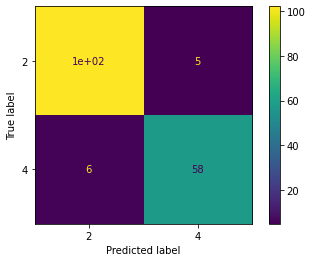

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
confusionMatrix = confusion_matrix(Y_test, y_pred)
dis = ConfusionMatrixDisplay(confusionMatrix, display_labels=classifier.classes_)
accuracy = accuracy_score(Y_test, y_pred)
print(confusionMatrix)
print(accuracy)

dis.plot()
plt.show()